In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from PIL import Image
from nibabel.testing import data_path
import os
import sys
%matplotlib inline
import plotly.express as px

In [2]:
import nibabel as nib
example_filename = ('VFAData.nii.gz')
img1 = nib.load(example_filename)
img1.shape
example_filename = ('B1map.nii.gz')
img2 = nib.load(example_filename)
#img2.shape
example_filename = ('133.nii')
img3 = nib.load(example_filename)
#img3.shape

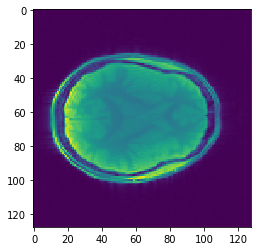

112.0081787109375


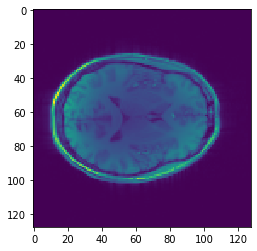

99.41046905517578


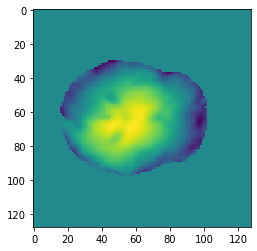

In [3]:
from PIL import Image 
from numpy import asarray 
data = img1.get_fdata()
data.shape
mapangles = asarray(data) 
data = img2.get_fdata()
data.shape
#ajust1 = np.ones((128,128))
#ajust2 = np.ones((128,128))/100
mapb1 = asarray(data)
#print(numpydata[125][64][0][1])
angle3 = mapangles[:,:,0,0]
angle20 = mapangles[:,:,0,1]
angle1 = np.deg2rad(3)
angle2 = np.deg2rad(20)
plt.imshow(angle3, interpolation='nearest')
plt.show()
print(angle3[60][60])
plt.imshow(angle20, interpolation='nearest')
plt.show()
print(angle20[60][60])
plt.imshow(mapb1, interpolation='nearest')
plt.show()
#print(mapb1[10][10])

In [4]:
from scipy.stats import rice
from scipy.optimize import leastsq

No handles with labels found to put in legend.


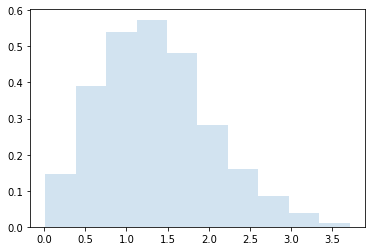

[1.33170111]
1.3304473406107034


In [5]:
b = 0.5
mean, var, skew, kurt = rice.stats(b, moments='mvsk')
fig, ax = plt.subplots(1, 1)
r = rice.rvs(b, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()
rice1 = rice.rvs(b, size = 1)
print(rice1)
print(mean)

In [6]:
def residual(variables, x, data, eps_data):
    """Model a decaying sine wave and subtract data."""
    T1 = variables[0]

    model = ((1-np.exp(-15/T1))/(1-np.cos(np.deg2rad(x))*np.exp(-15/T1)))*np.sin(np.deg2rad(x))

    return (data-model) / eps_data

In [7]:
TF=15
T1 = 1600
SNR = 100
xdata = np.array([1.0,2.0,4.0,7.0,12.0,15.0,20.0,30.0])
ydata = np.zeros(xdata.size)
ydata_rice = np.zeros(xdata.size)
#bruit = np.array([0.4,-1.0,0.02,0.7,-0.09,0.3,0.2])
for i in range (0, xdata.size):
    ydata[i] = ((1-np.exp(-TF/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TF/T1)))*np.sin(np.deg2rad(xdata[i]))#+bruit[i]/1000
#ydata_gauss = noise(ydata, "gaussian", [0,0.00001])
for i in range (0, xdata.size):
    ydata_rice[i] = ydata[i] + ((rice.rvs(b, size =1)-1)/SNR)
print(ydata_rice)
#SNR = ydata_gauss.mean()/np.std(ydata-ydata_gauss)
#print(20*np.log(SNR)/np.log(10))

[0.02141098 0.04709234 0.06720141 0.07895183 0.06472046 0.06583134
 0.05514228 0.03109355]


In [8]:
eps_data =1
variables = [1000]
out = leastsq(residual, variables, args=(xdata, ydata_rice, eps_data))[0]
print(out)

[1358.67001187]


In [9]:
#Comparaison méthode linéaire
pente = ((ydata_rice[4]/np.sin(np.deg2rad(xdata[4])))-(ydata_rice[0]/np.sin(np.deg2rad(xdata[0]))))/((ydata_rice[4]/np.tan(np.deg2rad(xdata[4])))-(ydata_rice[0]/np.tan(np.deg2rad(xdata[0]))))
T1 = -TF/(np.log(pente)) 
print(T1)

2083.359108264307


In [10]:
TF = 15
angles = np.array([]) #à remplir avec les angles (faire une fonction)
T1graph = np.zeros([128,128])
for i in range(0,127):   #Changer pour la taille des maps d'angle
    for j in range(0,127):
        coordx=i
        coordy=j
        Magnt = Ficher_nii[coordx, coordy, 0, :]  #Devrait être une array 1D?
        T1 = leastsq(residual, variables, args=(angles, Magnt, eps_data))[0]

NameError: name 'Ficher_nii' is not defined

In [11]:
Magnt_rice = np.ones(mapangles.shape) #ajuster aux dimensions de mapangles
SNR = 1
#Ajout de bruit
for a in range (0, mapangles.shape[3]): #Le 2 est sensé être la taille x de mapangles(:,:,:,x)
    for i in range(0, mapangles.shape[0]):   #Changer pour la taille des maps d'angle
        for j in range(0, mapangles.shape[1]):
            coordx=i
            coordy=j
            Magnt_rice[coordx][coordy][0][a] = mapangles[coordx][coordy][0][a] + ((rice.rvs(b, size =1)-1)) #ajuster avec SNR

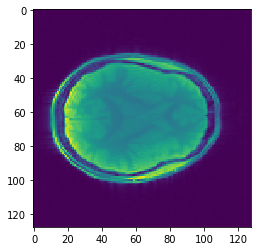

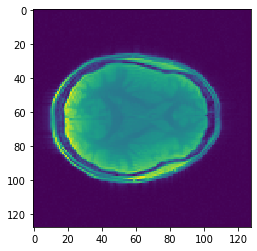

In [12]:
plt.imshow(angle3, interpolation='nearest')
plt.show()
plt.imshow((Magnt_rice[:,:,0,0]), interpolation='nearest')
plt.show()

In [13]:
TF = 15
SNR = 10
angles = np.array([np.deg2rad(3), np.deg2rad(20)]) #à remplir avec les angles (faire une fonction)
T1graph = np.ones([mapangles.shape[0], mapangles.shape[1]])*-808000 #facteur à enlever
for i in range(0, mapangles.shape[0]):   #Changer pour la taille des maps d'angle
    for j in range(0,mapangles.shape[1]):
        coordx=i
        coordy=j
        Magnt = Magnt_rice[coordx, coordy, 0, :]  #Devrait être une array 1D? Ce l'est
        T1 = leastsq(residual, variables, args=(angles, Magnt, eps_data))[0]
        if (T1 < -808000): #à changer...
            T1graph[coordx][coordy] = T1

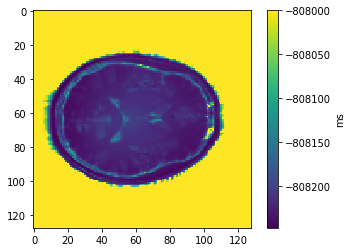

-808207.7370754967


In [14]:
plt.imshow(T1graph, interpolation='nearest')
cb = plt.colorbar()
cb.set_label('ms')
plt.show()
print(T1graph[60][60])

In [15]:
angles = np.array([np.deg2rad(3), np.deg2rad(20)])
Magnt = np.array([137.7, 167.9])
T1 = leastsq(residual, variables, args=(angles, Magnt, eps_data))[0]
print(T1)

[-808226.98671283]


In [16]:
print(mapangles[40, 40, 0, :])

[137.6811676  167.86486816]
